**Notebook Content:**
1. Imports
2. Exploratory Data Analysis
3. Transforming and Engineering Feautures

In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualiation tools
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sci-kit learn tools
from scipy.stats import skew



In [78]:
# given data imports
Housing_df = pd.read_csv('Housing.csv')

In [79]:
Housing_df.shape

(1460, 81)

In [30]:
# drop target (dependent variable) from training dataframe
actual_y = Housing_df['SalePrice']
#train_df = train_df.drop('SalePrice', axis=1)


**Exploratory Data Analysis**

In [31]:
Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> We can see that there exists many qualitative and missing values^
> 
> Let's take a look at the skewness of SalePrice to see if a log transformation will be necessary for linear regression.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skew is:  1.8828757597682129


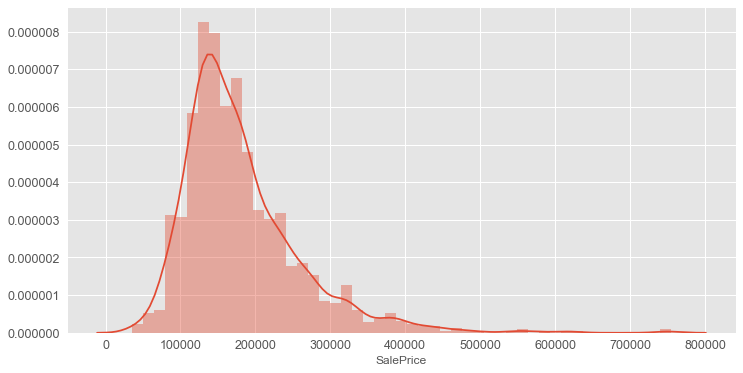

In [80]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(actual_y)
print("Skew is: ", actual_y.skew())

> You can see that the data is skewed. We will attempt to log-transform the data to bring the skew number closer to 0.

Skew is:  0.12133506220520406


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


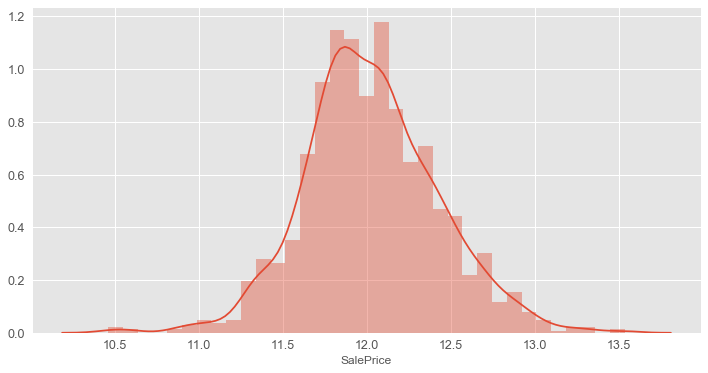

In [81]:
log_actual_y = np.log(actual_y)
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(log_actual_y)

print("Skew is: ", log_actual_y.skew())

> A skew value closer to 0 means that we have improved the skewness of the data. You can see from the plot that the logged data resembles a normal distribution!

We will handle quantitative and qualitative features seperately. We will begin with Quantitative features. We will examine correlation between actual SalePrice and quantitative features.

In [34]:
Housing_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [35]:
quant = Housing_df.select_dtypes(include=[np.number])
quant.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

> Examine correlations between SalePrice and target

In [82]:
# First and last 5 most correlated values
corr = quant.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We can now see the top 5 most postiviely correlated features with SalePrice. 
> If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”

Lets take a look at a correlation heatmap.

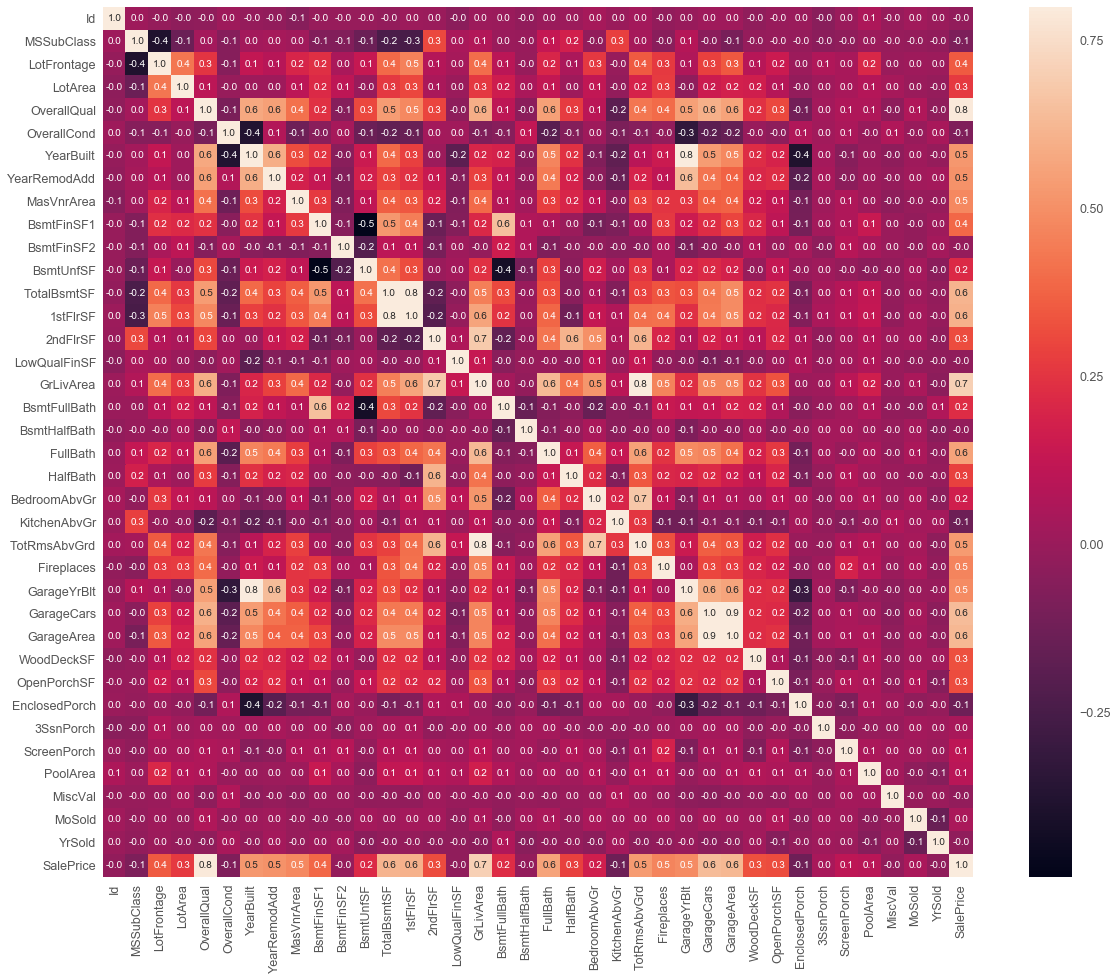

In [37]:
corr_map = Housing_df.corr()
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=.8, square=True, annot=True, fmt='.1f')
plt.show();

> We can see that 'GrLivArea' and 'TotRmsAbvGrd', 'TotalBsmtSF' and '1stFlrSF', 'YearBuilt' and 'GarageYrBlt' have high correlations. **These correlations are so strong that it can indicate a situation of multicollinearity**.

Lets take a moment to visualize these highly correlated numeric features (and later trim outliers).


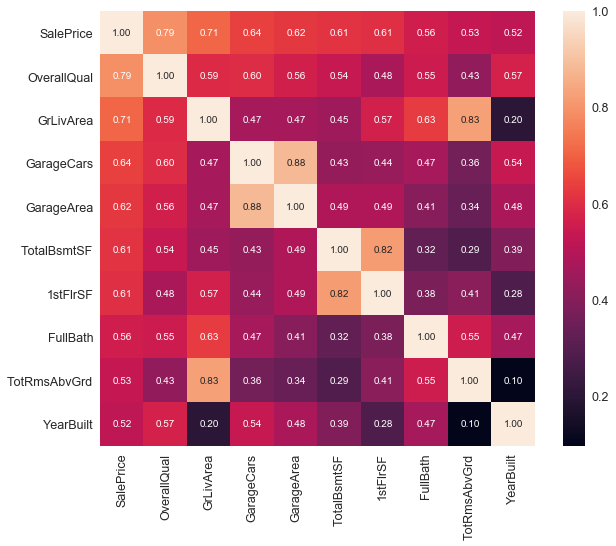

In [38]:
# Top 10 high correlation to SalePrice matrix
n = 10
cols = corr_map.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(Housing_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'GarageCars' and 'GarageArea' are like twins. So we just need one. We will choose 'GarageCars' because it has a stronger correlation to 'SalePrice'!
* 'TotalBsmtSF' and '1stFlrSF' are also twins. We will choose 'TotalBsmtSF' because of higher correlation to SP
* 'TotRmsAbvGrd' and 'GrLivArea' are also twins. We will choose 'GrLivArea'

> * (Drop 'GarageArea')
> * (Drop '1stFlrSF')
> * (Drop 'TotRmsAbvGrd')

In [39]:
Housing_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [40]:
# pivot table to further investigate relationship between 'OverallQual' and 'SalePrice'
quality_pivot = Housing_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


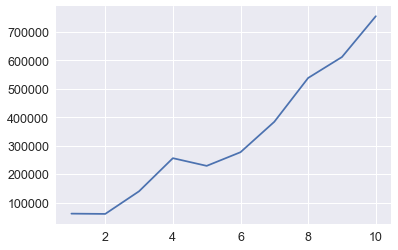

In [41]:
data = Housing_df[['OverallQual','SalePrice']]
data = data.groupby('OverallQual').max()
data = data.reset_index()
data
#f, ax = plt.subplots(figsize=(8, 4))
plt.plot(data['OverallQual'], data['SalePrice'], linestyle='solid')

#sns.lineplot(x='OverallQual', y = Housing_df.SalePrice, color='green',data=Housing_df)

> We can see that as the overall quality of the house increases so does the price of the house. This is an excellent variable for our model.

Now we will take a look at 'GrLivArea'

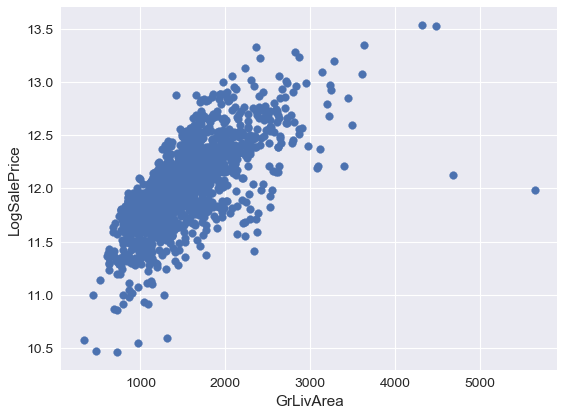

In [42]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = Housing_df['GrLivArea'], y = log_actual_y)
plt.ylabel('LogSalePrice')
plt.xlabel('GrLivArea')
plt.show()

> Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data.

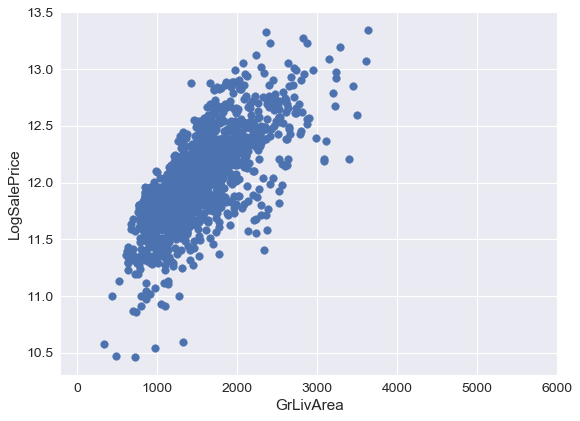

In [43]:
# remove outliers and update EDA_train
EDA_Housing=Housing_df
EDA_Housing = EDA_Housing[EDA_Housing['GrLivArea'] < 4000]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = EDA_Housing['GrLivArea'], y = np.log(EDA_Housing.SalePrice))
plt.xlim(-200,6000) # keeps same scale as first scatter plot
plt.ylabel('LogSalePrice')
plt.xlabel('GrLivArea')
plt.show()

Now we will take a look at garage area.

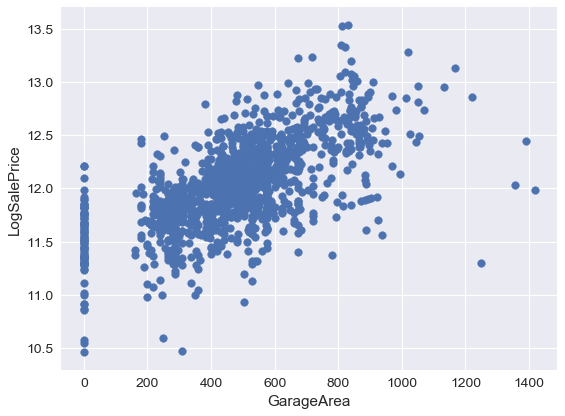

In [44]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = Housing_df['GarageArea'], y = np.log(Housing_df.SalePrice))
plt.ylabel('LogSalePrice')
plt.xlabel('GarageArea')
plt.show()

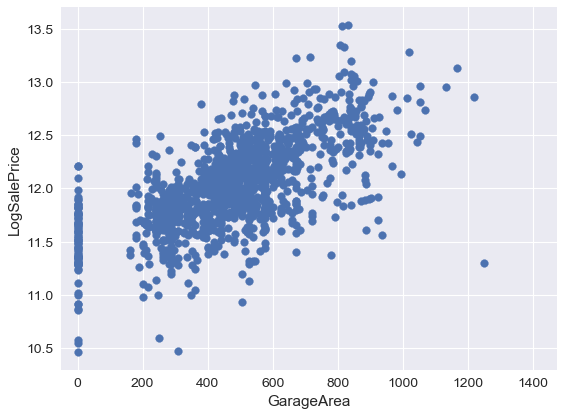

In [45]:
# remove outliers and update train_df
Housing_df = Housing_df[Housing_df['GarageArea'] < 1300]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = Housing_df['GarageArea'], y = np.log(Housing_df.SalePrice))
plt.xlim(-50,1475)
plt.ylabel('LogSalePrice')
plt.xlabel('GarageArea')
plt.show()

We can do more investigation on other variable outliers at a later date. Now we will take a look at missing values and begin imputation process.

In [46]:
Housing_df.shape[0]

1457

In [47]:
# Number of missing values in each column of training data
missing_vals = (Housing_df.isnull().sum())
print(missing_vals[missing_vals > 0])

LotFrontage      258
Alley           1366
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1451
Fence           1176
MiscFeature     1403
dtype: int64


We will drop all variables with a high amount of missing values. Why? None of these variables seem to be important or considered when deciding to buy a house (and that's probably why they have so many missing values). 
> Drop: 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'

In regards to the Garage-related variables with missing values, we already have a garage variable with a high correlation to SalePrice. That variable alone will do the trick so we will delete all Garage variables with missing data.
> Drop: 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'

The same logic applies to Bsmt variables. Also MasVnr variables correlate heavily with 'OverallQual' so we will delete those.

We will delete everything except for Electrical.

> General intution here was gathered from [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)


*We will now begin an analysis on the normality of some of our very important features. Let's note our most important variables thus far:*
> * OverallQual
> * GarageCars (recall all other garage variables have been dropped)
> * TotalBsmtSF (recall all other Bsmt variables have been dropped)
> * GrLivArea

Skew is:  1.1218988080126202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


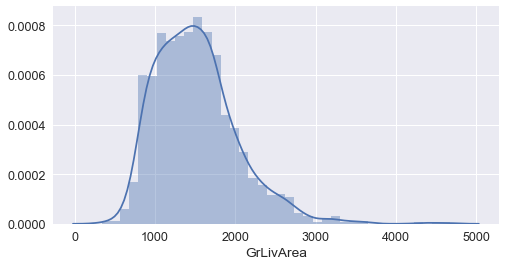

In [48]:
# GrLivArea
f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(Housing_df['GrLivArea'])
print("Skew is: ", Housing_df['GrLivArea'].skew())

Holy skew! Let's transform.

Skew is:  -0.044941390286500925


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


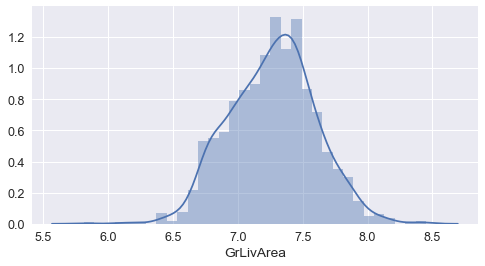

In [49]:
Housing_df['GrLivArea'] = np.log(Housing_df['GrLivArea'])

f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(Housing_df['GrLivArea'])
print("Skew is: ", Housing_df['GrLivArea'].skew())

Skew is:  0.5733577200542376


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


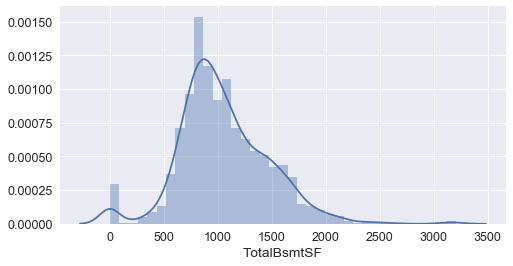

In [50]:
# TotalBsmtSF
f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(Housing_df['TotalBsmtSF'])
print("Skew is: ", Housing_df['TotalBsmtSF'].skew())

**Transforming and Engineering Features**
> Start with applying all drops and transformations noted in EDA section. 
> For this section I reference: [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)

In [51]:
Housing_df.shape

(1457, 81)

In [52]:
# we will begin by applying log transformation to skewed numeric features
num_data = Housing_df.dtypes[Housing_df.dtypes != "object"].index

skew_data = Housing_df[num_data].apply(lambda x: skew(x.dropna()))
skew_data = skew_data[skew_data > 0.75]
skew_data = skew_data.index
skew_data
Housing_df[skew_data] = np.log1p(Housing_df[skew_data])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


For the sake of working quick, we will encode all qualitative variables with dummy representations. At a later point we will re-visit qualitative variables with a more granular approach.

In [53]:
Housing_df.shape

(1457, 81)

In [54]:
missing_vals[missing_vals > 1]/len(Housing_df) *100

LotFrontage     17.707618
Alley           93.754290
MasVnrType       0.549073
MasVnrArea       0.549073
BsmtQual         2.539465
BsmtCond         2.539465
BsmtExposure     2.608099
BsmtFinType1     2.539465
BsmtFinType2     2.608099
FireplaceQu     47.357584
GarageType       5.559369
GarageYrBlt      5.559369
GarageFinish     5.559369
GarageQual       5.559369
GarageCond       5.559369
PoolQC          99.588195
Fence           80.713795
MiscFeature     96.293754
dtype: float64

In [55]:
Housing_df.drop(columns=['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'],inplace= True)

In [56]:
missing_vals = Housing_df.isnull().sum()
missing_vals[missing_vals > 1]

LotFrontage     258
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [86]:
df = Housing_df[["LotFrontage","MasVnrType","MasVnrArea",
"BsmtQual","BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"GarageType",
"GarageYrBlt","GarageFinish",
"GarageQual",
"GarageCond"]]

In [87]:
df.shape

(1460, 13)

In [58]:
Housing_df['GarageYrBlt'] = Housing_df['GarageYrBlt'].astype('object')

In [59]:
# drop all features with missing values, noted above : keep electrical
Housing_df_num = Housing_df.select_dtypes(exclude='object')
Housing_df_num.isnull().sum() >0 # Only LotFrontage
Housing_df_num['LotFrontage'] = Housing_df_num['LotFrontage'].fillna(Housing_df_num['LotFrontage'].median())
Housing_df_num['MasVnrArea'] = Housing_df_num['MasVnrArea'].fillna(Housing_df_num['MasVnrArea'].median())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
Housing_df_num.isnull().sum().sum()

0

In [61]:
Housing_df_cat = Housing_df.select_dtypes(include='object')
X = Housing_df_cat[Housing_df_cat['BsmtQual'].isnull()]
X[['BsmtExposure','BsmtCond','MasVnrType']].head()

,BsmtExposure,BsmtCond,MasVnrType
17,NaN,NaN,None
39,NaN,NaN,None
90,NaN,NaN,None
102,NaN,NaN,None
156,NaN,NaN,None


In [62]:
#Housing_df_cat = Housing_df.select_dtypes(include='object')
Housing_df_cat_miss = Housing_df_cat.isnull().sum()
Housing_df_cat_miss[Housing_df_cat_miss>1]

Housing_df_cat = Housing_df_cat.fillna('None')
print(Housing_df_cat.isnull().sum().sum())

0


In [63]:
print(Housing_df_num.shape)
Housing_df_cat.shape

(1457, 37)


(1457, 39)

In [64]:
all_data = pd.concat([Housing_df_cat,Housing_df_num],axis=1)
all_data.shape

(1457, 76)

In [65]:
# drop variables noted in EDA section
drop_me = ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd']
all_data = all_data.drop(drop_me, axis=1)

In [66]:
all_data = pd.get_dummies(all_data)

In [67]:
# quick look under the hood
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,1,0,0,0,0,1,0


In [68]:
# split concatonated data into train and test dataframes
from sklearn.model_selection import train_test_split
y = all_data['SalePrice']
X = all_data.loc[:, all_data.columns != 'SalePrice']
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

(1457, 374)


In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 374)
(438, 374)
(1019,)
(438,)


**Build the Model**
>  We will attempt to apply the following models:
> * Linear Regression
> * Decision Tree
> * Random Forests

In [88]:
# Linear Regression !
from sklearn import linear_model

linear_model = linear_model.LinearRegression()
lr_model = linear_model.fit(X_train, y_train)
Y_pred_lr  =linear_model.predict(X_train)
y_pred_test_lr = linear_model.predict(X_test)
print(y_pred_test_lr)

[ 1.20318385e+01  1.19530256e+01  1.18188602e+01  1.18550250e+01
  1.12302514e+01  1.13065561e+01  1.23990048e+01  1.17514580e+01
  1.19368526e+01  1.20160687e+01  1.16138599e+01  1.26773643e+01
  1.27211894e+01  1.27290682e+01  1.19676194e+01  1.14484422e+01
  1.21641658e+01  1.21966615e+01  1.17316721e+01  1.23135936e+01
  1.13743742e+01  1.24654514e+01  1.19183982e+01  1.26266594e+01
  1.21951240e+01  1.18846434e+01 -4.53098348e+06  1.16547766e+01
  1.19312344e+01  1.16584783e+01 -4.53098278e+06  1.21599067e+01
  1.20301067e+01  1.16886563e+01  1.17506973e+01  1.25253435e+01
  1.24771582e+01  1.23810075e+01  1.19938235e+01  1.16019511e+01
  1.16646714e+01  1.23424317e+01  1.11509804e+01  1.21806427e+01
  1.28705449e+01  1.22059140e+01  1.21151543e+01  1.17851114e+01
  1.21012374e+01  1.22854277e+01  1.20952502e+01  1.25555030e+01
  1.23679327e+01  1.16286200e+01  1.20849851e+01  1.23994241e+01
  1.20325092e+01  1.22297015e+01  1.17609788e+01  1.19782076e+01
  1.46810548e+06  1.27545

In [71]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,Y_pred_lr))

0.006745175331462211


In [75]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
Y_pred_dt =DT.predict(X_train)
#print(Y_pred_dt)
print(mean_squared_error(y_train,Y_pred_dt))
print(mean_squared_error(y_test,DT.predict(X_test)))

[12.15478461 11.98293534 12.26434627 ... 11.95118685 11.78676974
 12.4645872 ]
1.1385306538950039e-09
0.04698095606341449


In [76]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, max_depth = 6, n_jobs = 5)
rf_model.fit(X_train, y_train)
rf_model_predict = rf_model.predict(X_train)
print(rf_model_predict)

[12.14356901 11.8452543  12.21690318 ... 11.95090984 11.7651577
 12.36032176]


In [74]:
print(mean_squared_error(y_train,rf_model_predict))
print(mean_squared_error(y_test,rf_model.predict(X_test)))

0.012104662907850868
0.023301637774485295
